In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
train_data=pd.read_csv("./train.csv")
test_data=pd.read_csv("./test.csv")
#Replacing Sex and Embarked with numerical values
train_data['Sex'] = train_data['Sex'].replace(["female", "male"], [0, 1])
train_data['Embarked'] = train_data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
matrix = train_data.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Embarked       -0.030555  0.108669  0.043835 -0.118593  0.012186 -0.060606   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030555  
Survived     0.081629  0.257307  0.108669  
Pclass       0.018443 -0.549500  0.043835  
Sex         -0.245489 -0.182333 -0.118593  

C:\Users\Niharika Kolli\AppData\Local\Temp\ipykernel_20360\1974247844.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train_data.corr()


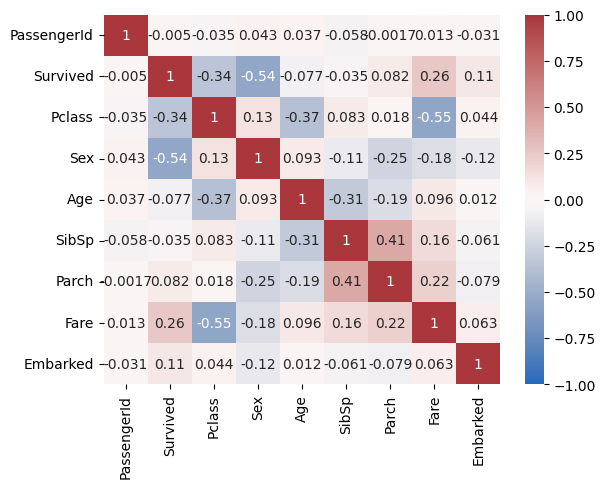

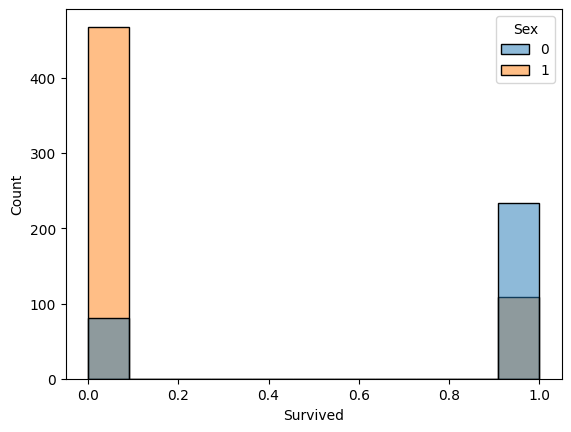

In [15]:
#Heatmap showing the correlation between variables
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
sns.histplot(data=train_data, x="Survived", hue="Sex")
classifier=GaussianNB()
train_data.dropna(axis=0,inplace=True)
test_data['Sex'] = train_data['Sex'].replace(["female", "male"], [0, 1])
test_data['Embarked'] = train_data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
test_data.dropna(axis=0,inplace=True)
x=train_data.loc[:,['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
y=train_data['Survived']
x_test=test_data.loc[:,['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
y_test=test_data

In [16]:
from sklearn.metrics import accuracy_score
classifier.fit(x,y)
y_pred=classifier.predict(x_test)
print('accuracy is',accuracy_score(y[:13], y_pred))

accuracy is 0.8461538461538461


C:\Users\Niharika Kolli\AppData\Local\Temp\ipykernel_20360\3267304584.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('accuracy is',accuracy_score(y[:13], y_pred))
